<a href="https://colab.research.google.com/github/JuniorHZ19/ML/blob/main/redconvolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown # *0) ** Instalando libreria(OBLIGATORIO)

!pip install torch torchvision torchaudio

In [ ]:
#@markdown # *1) ** Descargando DataSet  de perros y gatos(OBLIGATORIO)
import zipfile

nombre_zip="data_set_dogcat.zip"

directorio_destino="/content/"

!gdown --id 19u9sy2053Ds739lyYSJut6S_k54trLnd -O {nombre_zip}

with zipfile.ZipFile(nombre_zip, 'r') as zip_ref:
    zip_ref.extractall(directorio_destino)



In [24]:
#@markdown # *1) ** Creacion de el csv de los path y clases(OBLIGATORIO)
import os
import pandas as pd
def crear_paths_csv(directorio_base,clases_lista,clases,nombre_archivo):

   columnas=["path","etiqueta"]
   datos_csv=[]

   for dir_base,dir,clase in  zip(directorio_base,clases_lista,clases):

    for path  in (dir):

     datos_csv.append([dir_base+path ,clase])


   df_lista=pd.DataFrame(datos_csv,columns=columnas)
   df_lista.to_csv(nombre_archivo,index=False)
   print("Csv Creado")

directorio_gato="/content/PetImages/Cat/"
directorio_perro="/content/PetImages/Dog/"

gato_lista=os.listdir(directorio_gato)
perro_list=os.listdir(directorio_perro)

crear_paths_csv([directorio_gato,directorio_perro],[gato_lista,perro_list],[0,1],"Data_set_paths.csv")


Csv Creado


In [37]:
import torch
from torch.utils.data import Dataset
import pandas as pd
from torchvision import transforms,Sampler
import sklearn

from PIL import Image


class MiDataSet(Dataset):

  def __init__(self,csv_file, transform=None):


     self.data=pd.read_csv(csv_file)

     self.x=self.data["path"]
     self.y=self.data["etiqueta"]
     self.transform=transform

     self.samples=self.data["path"].shape[0]


  def __getitem__(self,id):

    rut_imagen=self.x[id]
    imagen=Image.open(rut_imagen)

    transformaciones = transforms.Compose([
    transforms.Resize((24, 24)),
    transforms.ToTensor(),

                  ])

    x_imagen=transformaciones(imagen)/255

    etiqueta=self.y[id]




    return x_imagen,etiqueta


  def __len__(self):
   return self.samples









TypeError: ignored

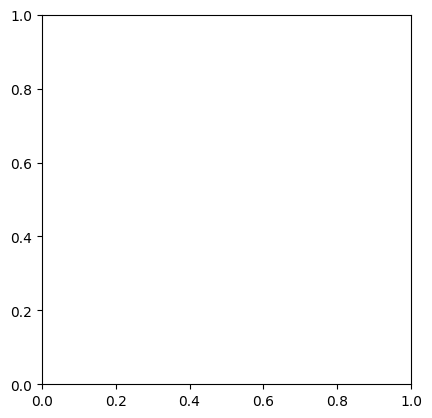

In [43]:
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

mis_datos=MiDataSet("/content/Data_set_paths.csv")

mis_datos.__getitem__(6)[0]


plt.imshow(mis_datos.__getitem__(6)[0])
plt.title(f'Etiqueta: {mis_datos.__getitem__(6)[0]}')
plt.show()




In [ ]:



from torch.utils.data import DataLoader, TensorDataset


conjunto_entrenamiento = TensorDataset(X_entrenamiento, y_entrenamiento)

conjunto_prueba = TensorDataset(X_prueba, y_prueba)



data_por_lote_entrenamiento=DataLoader(conjunto_entrenamiento,batch_size=100,shuffle=True)

data_por_por_lote_test=DataLoader(conjunto_prueba,batch_size=100,shuffle=True)



datos_features_train,datos_label_train=next(iter(data_por_lote_entrenamiento))

datos_features_test,datos_label_test=next(iter(data_por_por_lote_test))


print(datos_features_test.shape)




torch.Size([100, 10])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F



class PerceptronMulticapa(nn.Module):

   def __init__(self,input_size):
    super(PerceptronMulticapa,self).__init__()

    self.capa_oculta1=nn.Linear(input_size,3)

    self.capa_oculta2=nn.Linear(3,4)

    self.capa_salida =nn.Linear(4,1)

   def forward(self,x):

     x=self.capa_oculta1(x)
     x=F.relu(x)

     x=self.capa_oculta2(x)
     x=F.relu(x)

     x=self.capa_salida(x)
     output=torch.sigmoid(x)




     return output


In [ ]:



#funcion clasificador:
def clasificador(y_pred_test):

  umbral = 0.6
  y_pred_test_binario = (y_pred_test >= umbral).to(torch.float32)

  return y_pred_test_binario

#funcion acutity:
def accurity(y_test,y_real):
   correctos=0
   for predicho, real in zip(y_test, y_real):
    if predicho==real:
     correctos+=1
   return correctos/len(y_test)


import torch.optim as optim

input_size=X_entrenamiento.shape[1]

PerceptronMulti=PerceptronMulticapa(input_size)

criterio=nn.BCELoss()

optimizer=optim.SGD(PerceptronMulti.parameters(),lr=0.1)

epochs=500

for epoch in range(epochs):

  y_predict=PerceptronMulti(X_entrenamiento)

  loss=criterio(y_predict,y_entrenamiento.view(-1,1))

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  with torch.no_grad():
   y_predict_test=PerceptronMulti(X_prueba)
   y_predic_test_clasificado=clasificador(y_predict_test)



   Precision=accurity(y_prueba,y_predic_test_clasificado)



  print(f'Epoca[{epoch+1}],Perdida: {loss.item():.4f} ,Accuracy: {Precision:.4f}')


#nuevo datos:

def escalarNuevaData(data):

    scaler=StandardScaler()

    datos_escalados=scaler.fit_transform(data)

    datos_x_tensor=torch.from_numpy(datos_escalados).float()

    return datos_x_tensor

nuevo_x=escalarNuevaData([[1,29,0,0,211,1,0,0,0,1]])

y_predict=PerceptronMulti(nuevo_x)

print(clasificador(y_predict))

Epoca[1],Perdida: 0.7630 ,Accuracy: 0.6145
Epoca[2],Perdida: 0.7559 ,Accuracy: 0.6107
Epoca[3],Perdida: 0.7493 ,Accuracy: 0.6069
Epoca[4],Perdida: 0.7433 ,Accuracy: 0.6183
Epoca[5],Perdida: 0.7377 ,Accuracy: 0.6183
Epoca[6],Perdida: 0.7325 ,Accuracy: 0.6183
Epoca[7],Perdida: 0.7277 ,Accuracy: 0.6183
Epoca[8],Perdida: 0.7233 ,Accuracy: 0.6183
Epoca[9],Perdida: 0.7191 ,Accuracy: 0.6183
Epoca[10],Perdida: 0.7153 ,Accuracy: 0.6183
Epoca[11],Perdida: 0.7118 ,Accuracy: 0.6183
Epoca[12],Perdida: 0.7084 ,Accuracy: 0.6183
Epoca[13],Perdida: 0.7053 ,Accuracy: 0.6183
Epoca[14],Perdida: 0.7025 ,Accuracy: 0.6183
Epoca[15],Perdida: 0.6998 ,Accuracy: 0.6183
Epoca[16],Perdida: 0.6973 ,Accuracy: 0.6183
Epoca[17],Perdida: 0.6949 ,Accuracy: 0.6183
Epoca[18],Perdida: 0.6927 ,Accuracy: 0.6183
Epoca[19],Perdida: 0.6906 ,Accuracy: 0.6183
Epoca[20],Perdida: 0.6887 ,Accuracy: 0.6183
Epoca[21],Perdida: 0.6869 ,Accuracy: 0.6183
Epoca[22],Perdida: 0.6851 ,Accuracy: 0.6183
Epoca[23],Perdida: 0.6835 ,Accuracy: 0.61

In [ ]:


y_pred_multiclases = torch.tensor([[0.1, 1.8, 0.8, 0.4, 2],
                                   [0.5, 2, 3.5, 5, 2.1]])

def clasificador(y_pred_test):

   max_values_tensor = torch.empty((0,), dtype=torch.float32)

   for tensor in y_pred_test:

     max_values, max_indices  = torch.max(tensor, dim=0)

     max_values_tensor = torch.cat((max_values_tensor, max_indices.unsqueeze(0)))

   return max_values_tensor

print(clasificador(y_pred_multiclases))


tensor([4., 3.])
